# Task 4- Chaotic dynamics

In [28]:
from helpers.math import calc_logistic_map_orbit, calc_lorenz_attractor, calc_trajectory_difference, calc_trajectory_passing_threshold
from helpers.plots import plot_logistic_map_bifurcation, plot_logistic_map_orbit, plot_lorenz_attractor, plot_trajectory_difference


# Part 1 - Logistic Map Bifurcation Analyses

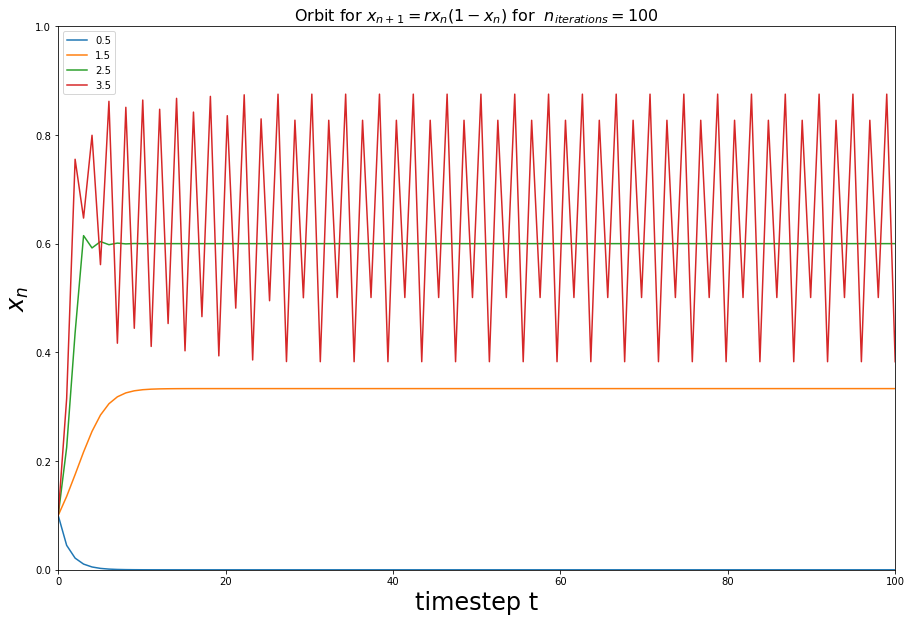

In [29]:
orbit_r1, T, r1 = calc_logistic_map_orbit(0.5,100)
orbit_r2, T, r2  = calc_logistic_map_orbit(1.5,100)
orbit_r3, T, r3 = calc_logistic_map_orbit(2.5,100)
orbit_r4, T, r4 = calc_logistic_map_orbit(3.5,100)

r_values = [r1,r2,r3,r4]

plot_logistic_map_orbit(T, r_values, orbit_r1, orbit_r2, orbit_r3, orbit_r4)

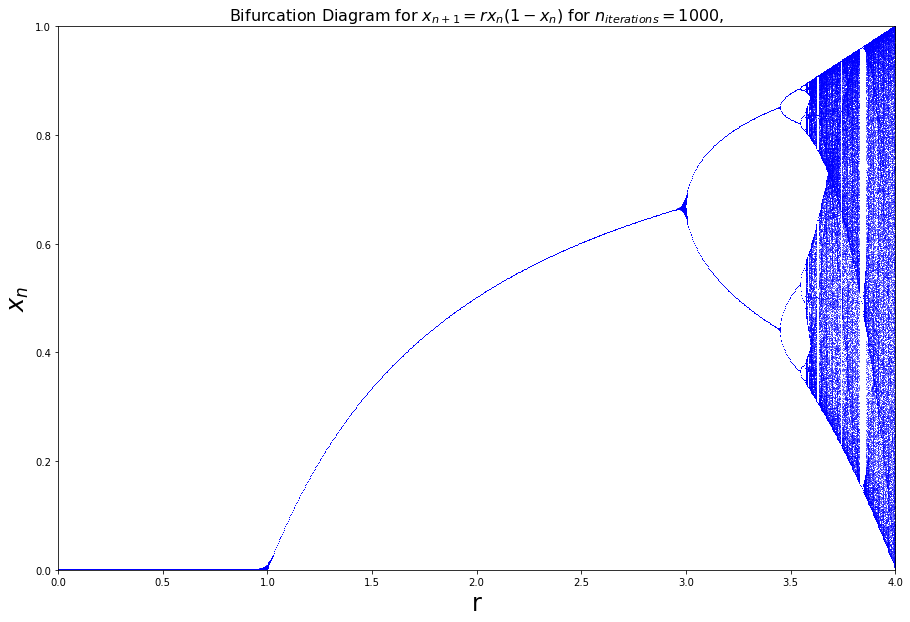

In [30]:
plot_logistic_map_bifurcation(0,4,0.2,1000,100)

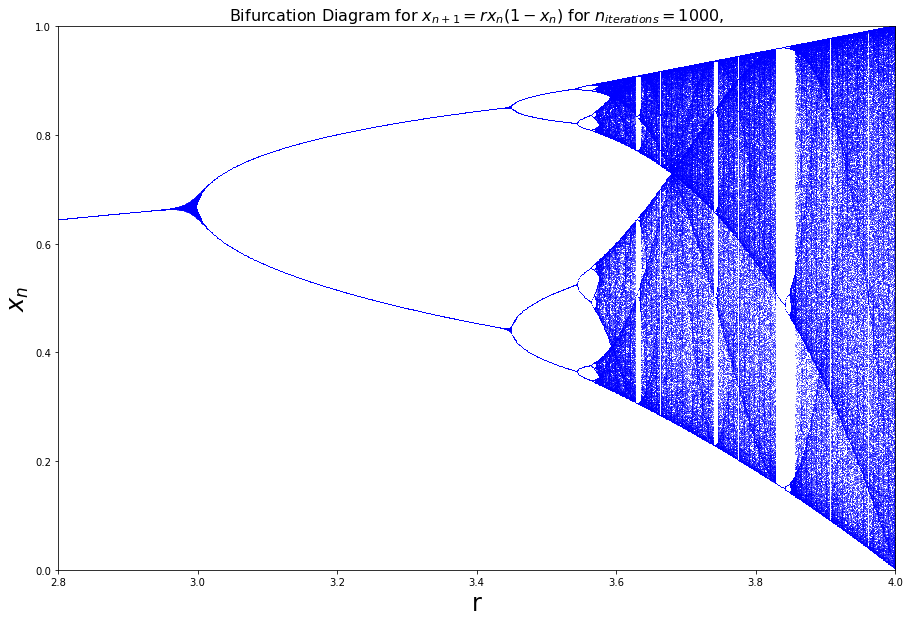

In [31]:
plot_logistic_map_bifurcation(2.8,4,0.2,1000,100)

# Part 2 - Lorenz Attractor Analyses

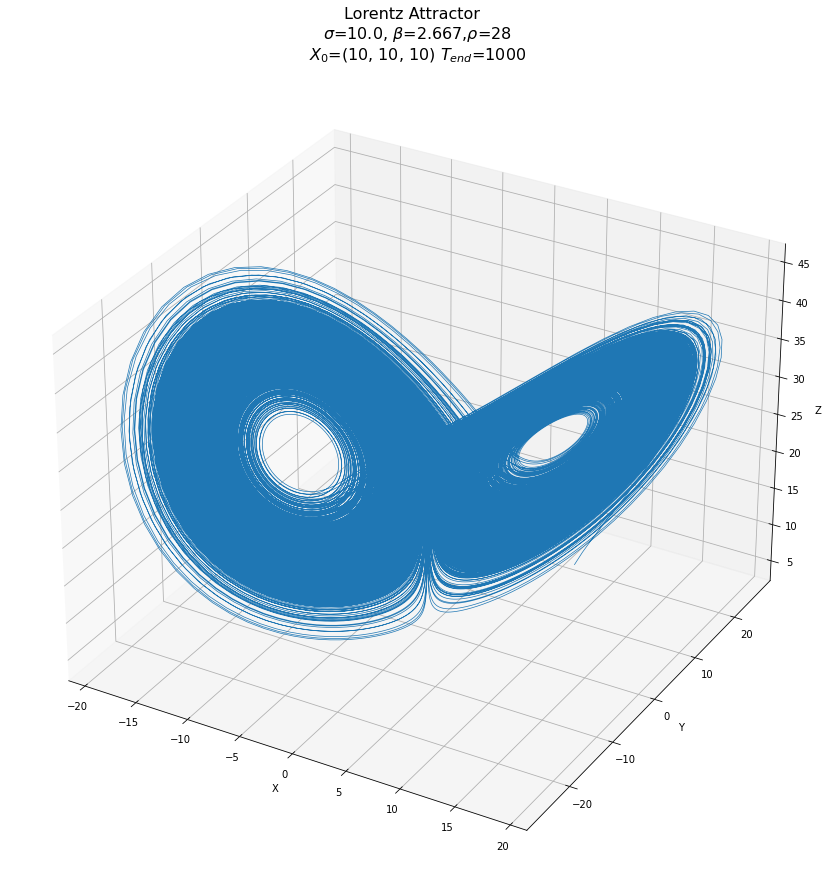

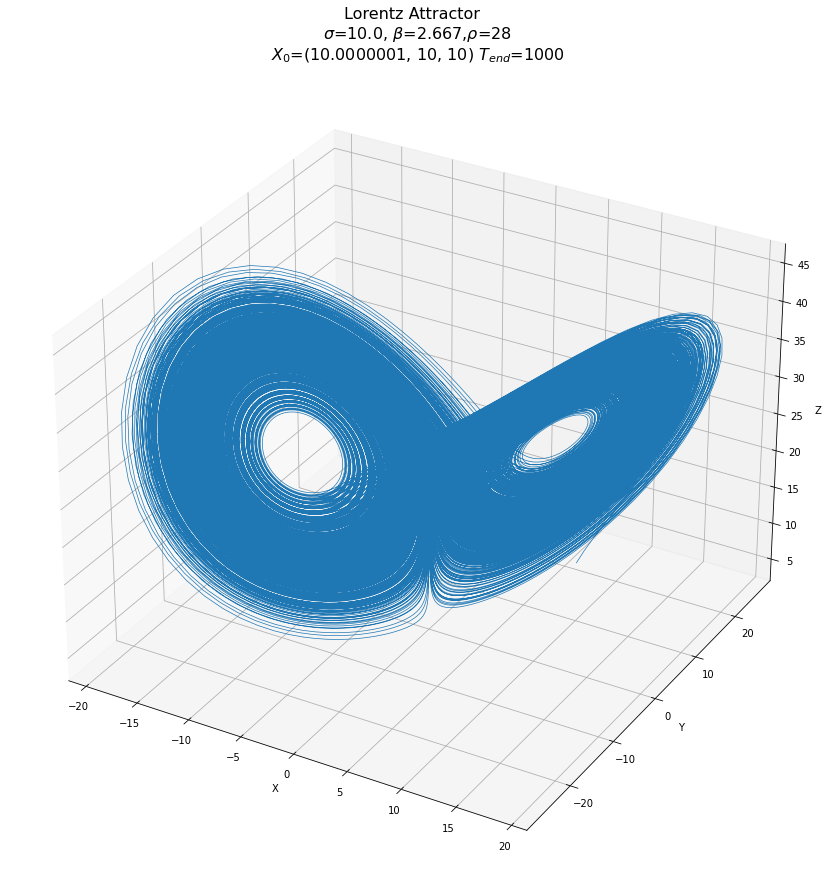

In [32]:

#Initial State
x0 = (10,10,10)
x0_hat = (10+10e-8,10,10)

#Parameter Settings
sigma = 10.0
beta = 8.0/3.0
rho = 28

#Time 
T_end = 1000

x_t = calc_lorenz_attractor(sigma, beta, rho, x0, T_end)
plot_lorenz_attractor(x_t, sigma, beta, rho, x0, T_end)

x_t_hat = calc_lorenz_attractor(sigma, beta, rho, x0_hat, T_end)
plot_lorenz_attractor(x_t_hat, sigma, beta, rho, x0_hat, T_end)

The threshold = 1 was reached after 0.02035 simulated seconds


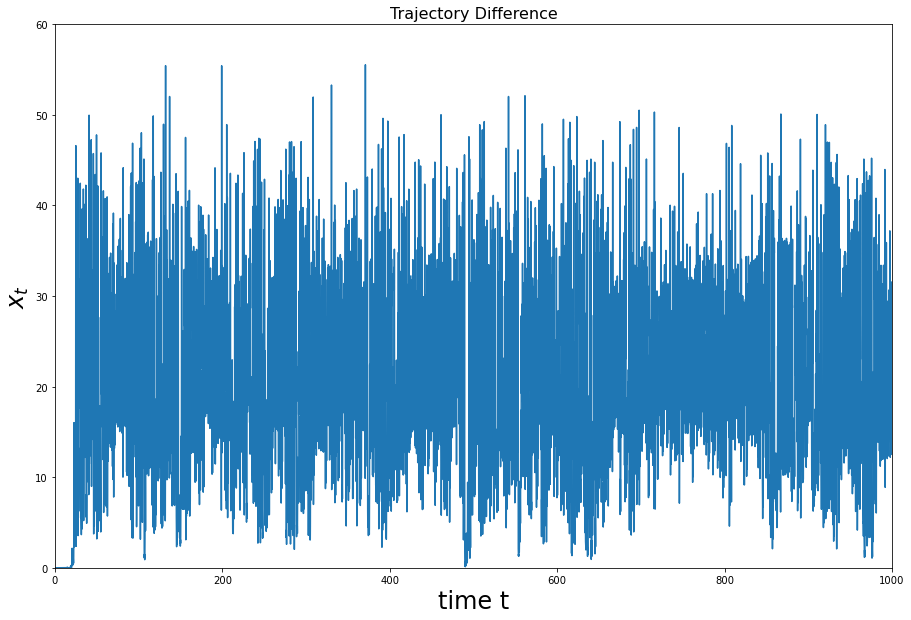

In [33]:
x_t_difference, T = calc_trajectory_difference(x_t,x_t_hat)
plot_trajectory_difference(x_t_difference,T)
calc_trajectory_passing_threshold(x_t_difference, 1)

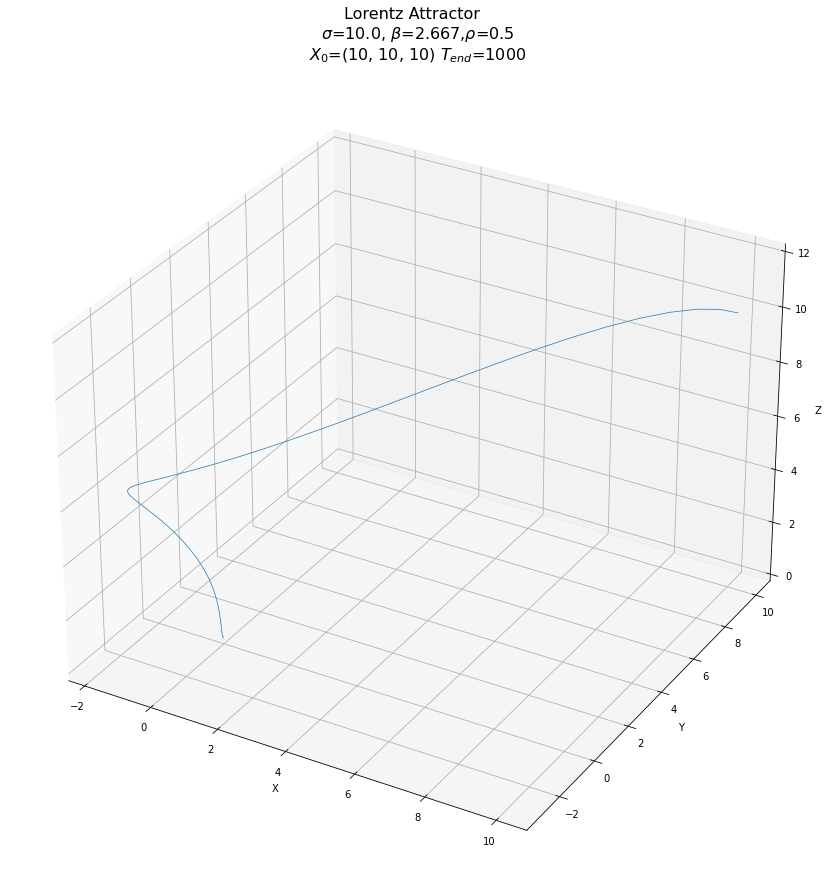

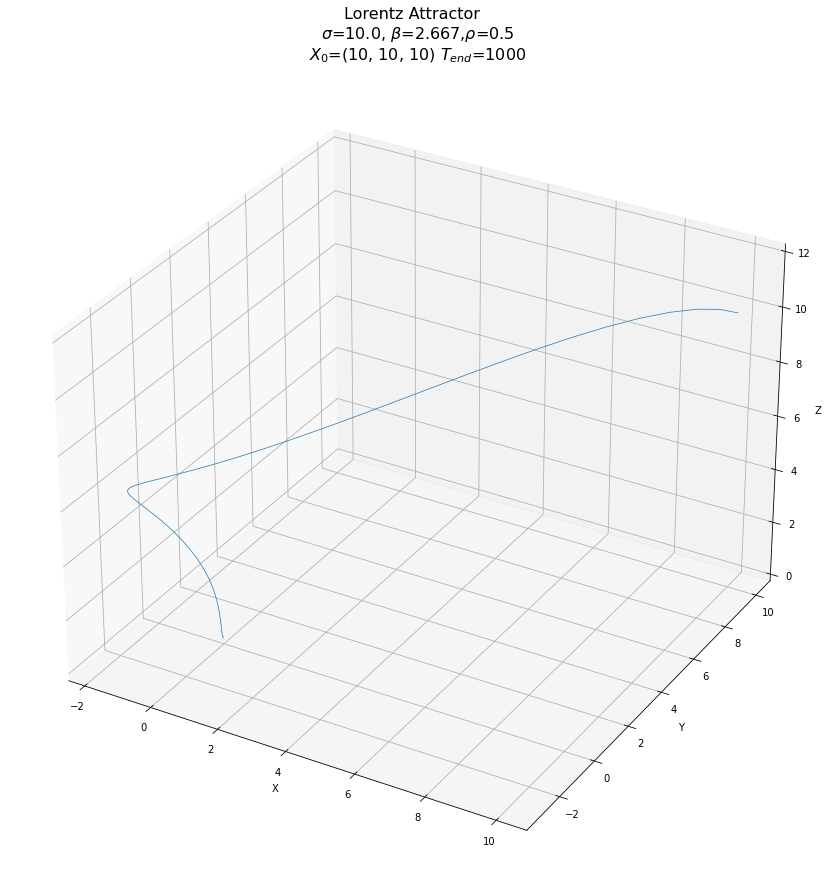

In [34]:
#Initial State
x0 = (10,10,10)
x0_hat = (10+10e-8,10,10)

#Parameter Settings
sigma = 10.0
beta = 8.0/3.0
rho = 0.5

#Time 
T_end = 1000

x_t = calc_lorenz_attractor(sigma, beta, rho, x0, T_end)
plot_lorenz_attractor(x_t,sigma, beta, rho, x0, T_end)

x_t_hat = calc_lorenz_attractor(sigma, beta, rho, x0_hat, T_end)
plot_lorenz_attractor(x_t_hat,sigma, beta, rho, x0_hat, T_end)